In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [30]:
datosPCA = pd.read_csv('C:/Users/JCfor/Desktop/Proyecto Tesis I/DatasetFinal.csv')
##Variable valor de traspaso
valor = datosPCA['Valor de traspaso'].str.split('-',expand = True)
valor.columns = ['MenorV', 'V_traspaso']
datosPCA = pd.concat( [ datosPCA,valor.V_traspaso ] , axis= 1)

##Variable Sueldo
datosPCA['Sueldo'] = datosPCA['Sueldo'].str.extract('(\d+)', expand=False).astype(float)
datosPCA['Sueldo'] = datosPCA['Sueldo']*1000
datosPCA.head()

datosPCA = datosPCA.drop( ['Inf', 'Source.Name', 'Rec', 'Nombre', 'Club', 'División', 'Posición', 'Edad', 'Sueldo', 'V_traspaso','Valor de traspaso' ], axis=1)
#datos.describe().columns
#datos.to_excel('data.xlsx')

In [31]:
datosPCA['Valoracion'].replace(' ',np.nan, inplace = True)
datosPCA.dropna(subset=['Valoracion'], inplace = True)
#datos.info()

In [32]:
x_PCA = np.asanyarray(datosPCA.drop(columns=['Valoracion']))
#y = np.asanyarray(datos[['Valoracion']])
y_PCA=datosPCA['Valoracion']
#x = StandardScaler().fit_transform(x)

print(x_PCA.shape)
print(y_PCA.shape)

(3191, 47)
(3191,)


In [33]:
#https://medium.com/analytics-vidhya/what-is-random-state-in-machine-learning-84c1c9dffaad
x_trainPCA, x_testPCA, y_trainPCA, y_testPCA = train_test_split(x_PCA,y_PCA,test_size=0.2, random_state=3)
#y_test.shape
x_trainPCA, x_valPCA, y_trainPCA, y_valPCA = train_test_split(x_trainPCA, y_trainPCA, test_size=0.25, random_state=3)

In [34]:
#x_train = preprocessing.normalize(x_train)
#x_test = preprocessing.normalize(x_test)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
scaler = StandardScaler()
x_trainPCA = scaler.fit_transform(x_trainPCA)
x_testPCA = scaler.fit_transform(x_testPCA)

In [35]:
pca = PCA(n_components=2)

In [36]:
pca.fit(x_trainPCA)
pca.fit(x_testPCA)

PCA(n_components=2)

In [37]:
x_trainPCA = pca.transform(x_trainPCA)
x_testPCA = pca.transform(x_testPCA)

In [38]:
print(x_trainPCA.shape)
print(x_testPCA.shape)

(1914, 2)
(639, 2)


In [39]:
modeloPCA = keras.Sequential([
    keras.layers.Dense(6, activation='sigmoid', input_shape=(2,)),
    keras.layers.Dense(1)
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.001,
momentum=0.1)

modeloPCA.compile(optimizer = sgd,
               loss='mse',
               metrics=['mae'])

In [40]:
historyPCA = modeloPCA.fit(x_trainPCA, y_trainPCA, epochs= 600, batch_size= 10, validation_data= (x_testPCA, y_testPCA))

Epoch 1/600
192/192 [==============================] - 1s 2ms/step - loss: 767.8074 - mae: 21.4872 - val_loss: 173.0206 - val_mae: 10.0833
Epoch 2/600
192/192 [==============================] - 0s 1ms/step - loss: 105.3307 - mae: 8.1101 - val_loss: 66.5920 - val_mae: 6.5630
Epoch 3/600
192/192 [==============================] - 0s 1ms/step - loss: 59.1268 - mae: 6.0806 - val_loss: 45.1614 - val_mae: 5.2407
Epoch 4/600
192/192 [==============================] - 0s 1ms/step - loss: 44.6900 - mae: 5.1905 - val_loss: 37.1633 - val_mae: 4.7157
Epoch 5/600
192/192 [==============================] - 0s 1ms/step - loss: 37.1843 - mae: 4.6913 - val_loss: 33.7204 - val_mae: 4.5088
Epoch 6/600
192/192 [==============================] - 0s 1ms/step - loss: 33.8428 - mae: 4.4709 - val_loss: 31.0113 - val_mae: 4.2744
Epoch 7/600
192/192 [==============================] - 0s 1ms/step - loss: 31.9211 - mae: 4.3434 - val_loss: 30.5756 - val_mae: 4.2031
Epoch 8/600
192/192 [=============================

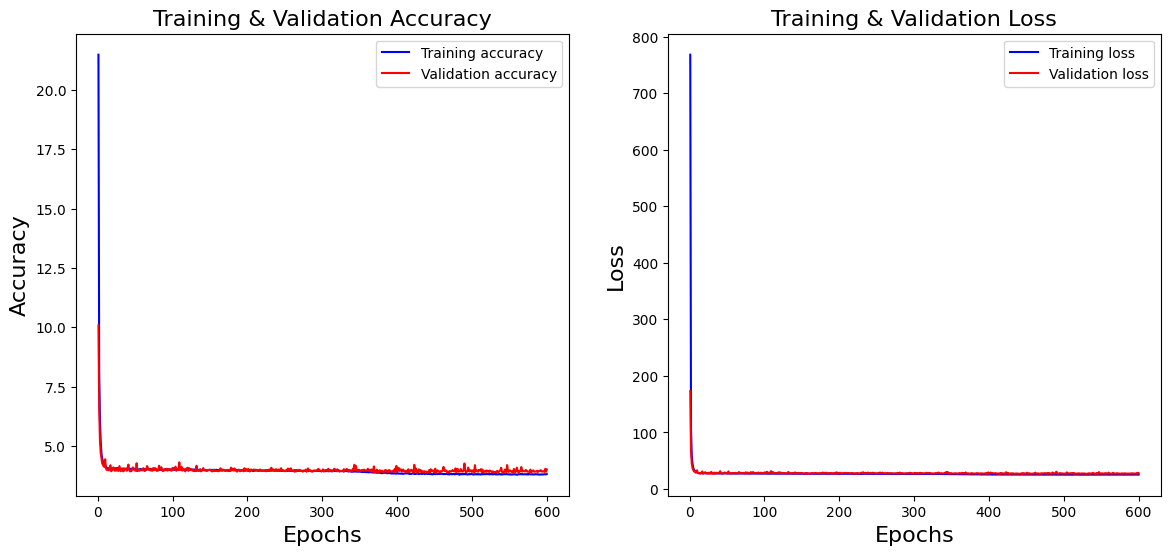

In [43]:
import matplotlib.pyplot as plt
 
#history_dict = history.history
history_dict = historyPCA.history
loss_values = history_dict['loss']
val_loss_values= history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'r', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'r', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [44]:
from sklearn.metrics import r2_score
y_train_pred = modeloPCA.predict(x_trainPCA)
y_test_pred = modeloPCA.predict(x_testPCA)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_trainPCA, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_testPCA, y_test_pred)))

20/20 [==============================] - 0s 765us/step
The R2 score on the Train set is:	0.930
The R2 score on the Test set is:	0.922
